In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from tools.hh_experiments_loading import load_tsp_results, load_exp, exp_progress_loader, exp_chronics_loader

In [2]:
tsp_problems = [
        "kroA100.tsp",
        "pr439.tsp",
        "rat783.tsp",
        "pla7397.tsp",
    ]
instances_optimums = {
        "eil51.tsp":    426,
        "kroA100.tsp":  21282,
        "kroA150.tsp":  26524,
        "kroB200.tsp":  29437,
        "pr439.tsp":    107217,
        "rat783.tsp":   8806,
        "pla7397.tsp":  23260728,
        "d15112.tsp":   1573084
    }

In [3]:
llh_selection = {
    "4.1.1" : "py.ES",
    "4.1.2" : "py.ES",
    "4.1.3" : "py.ES",
    "4.1.4" : "py.ES",
    "4.1.5" : "py.ES",
    "4.2.1" : "py.SA",
    "4.2.2" : "py.SA",
    "4.2.3" : "py.SA",
    "4.2.4" : "py.SA",
    "4.2.5" : "py.SA",
    "4.3.1" : "j.ES",
    "4.3.2" : "j.ES",
    "4.3.3" : "j.ES",
    "4.3.4" : "j.ES",
    "4.3.5" : "j.ES",
    "1.1."  : "Random",
    "1.2."  : "Random",
    "2.1."  : "FRAMAB",
    "2.2."  : "FRAMAB",
    "3.1."  : "BRR",
    "3.2."  : "BRR",
    "1.3."  : "Random",
    "2.4."  : "FRAMAB",
    "2.5."  : "FRAMAB",
    "3.4."  : "BRR",
    "3.5."  : "BRR"
}

parameter_selection = {
    "4.1.1" : "Default",
    "4.1.2" : "Tuned",
    "4.1.3" : "Random",
    "4.1.4" : "TPE",
    "4.1.5" : "BRR",
    "4.2.1" : "Default",
    "4.2.2" : "Tuned",
    "4.2.3" : "Random",
    "4.2.4" : "TPE",
    "4.2.5" : "BRR",
    "4.3.1" : "Default",
    "4.3.2" : "Tuned",
    "4.3.3" : "Random",
    "4.3.4" : "TPE",
    "4.3.5" : "BRR",
    "1.1."  : "Default",
    "1.2."  : "Tuned",
    "2.1."  : "Default",
    "2.2."  : "Tuned",
    "3.1."  : "Default",
    "3.2."  : "Tuned",
    "1.3."  : "Random",
    "2.4."  : "TPE",
    "2.5."  : "BRR",
    "3.4."  : "TPE",
    "3.5."  : "BRR"
}

code_desc_w_codes = {
    "4.1.1" : "py.ES default (4.1.1)",
    "4.1.2" : "py.ES tuned (4.1.2)",
    "4.1.3" : "py.ES random (4.1.3)",
    "4.1.4" : "py.ES TPE (4.1.4)",
    "4.1.5" : "py.ES BRR (4.1.5)",
    "4.2.1" : "py.SA default (4.2.1)",
    "4.2.2" : "py.SA tuned (4.2.2)",
    "4.2.3" : "py.SA random (4.2.3)",
    "4.2.4" : "py.SA TPE (4.2.4)",
    "4.2.5" : "py.SA BRR (4.2.5)",
    "4.3.1" : "j.ES default (4.3.1)",
    "4.3.2" : "j.ES tuned (4.3.2)",
    "4.3.3" : "j.ES random (4.3.3)",
    "4.3.4" : "j.ES TPE (4.3.4)",
    "4.3.5" : "j.ES BRR (4.3.5)",
    "1.1."  : "random default (1.1)",
    "1.2."  : "random tuned (1.2)",
    "2.1."  : "FRAMAB defaul (2.1)",
    "2.2."  : "FRAMAB tuned (2.2)",
    "3.1."  : "BRR default (3.1)",
    "3.2."  : "BRR tuned (3.2)",
    "1.3."  : "random random (1.3)",
    "2.4."  : "FRAMAB TPE (2.4)",
    "2.5."  : "FRAMAB BRR (2.5)",
    "3.4."  : "BRR TPE (3.4)",
    "3.5."  : "BRR BRR (3.5)"
}

code_desc_wo_codes = {
    "4.1.1" : "py.ES default",
    "4.1.2" : "py.ES tuned",
    "4.1.3" : "py.ES random",
    "4.1.4" : "py.ES TPE",
    "4.1.5" : "py.ES BRR",
    "4.2.1" : "py.SA default",
    "4.2.2" : "py.SA tuned",
    "4.2.3" : "py.SA random",
    "4.2.4" : "py.SA TPE",
    "4.2.5" : "py.SA BRR",
    "4.3.1" : "j.ES default",
    "4.3.2" : "j.ES tuned",
    "4.3.3" : "j.ES random",
    "4.3.4" : "j.ES TPE",
    "4.3.5" : "j.ES BRR",
    "1.1."  : "random default",
    "1.2."  : "random tuned",
    "2.1."  : "FRAMAB default",
    "2.2."  : "FRAMAB tuned",
    "3.1."  : "BRR default",
    "3.2."  : "BRR tuned",
    "1.3."  : "random random",
    "2.4."  : "FRAMAB TPE",
    "2.5."  : "FRAMAB BRR",
    "3.4."  : "BRR TPE",
    "3.5."  : "BRR BRR"
}

In [4]:
sns.set(context='talk', font_scale=0.9, rc={'figure.figsize':(20,9)})

In [5]:
#loading the experiments 
all_processes, all_final_results = load_tsp_results("./dumps/1st benchmark/", exp_progress_loader)

Running BRISE without the API!
/media/sem/B54BE5B22C0D3FA81/TUD/Master/code/experiments/tools/hh_experiments_loading.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repetition_final_results['Repetition'] = repetition
/home/sem/mypyvenv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
all_final_results

,Mode,Repetition,improvement,iteration,objective,Code,Experiment Group,TSP instance,Optimum
336,jMetalPyES,0.0,0.314592,336.0,1.324050e+05,4.1.1,MH,kroA100.tsp,21282
336,jMetalPyES,1.0,0.307124,336.0,1.340770e+05,4.1.1,MH,kroA100.tsp,21282
336,jMetalPyES,2.0,0.327534,336.0,1.336990e+05,4.1.1,MH,kroA100.tsp,21282
336,jMetalPyES,3.0,0.324750,336.0,1.340750e+05,4.1.1,MH,kroA100.tsp,21282
336,jMetalPyES,4.0,0.305534,336.0,1.343770e+05,4.1.1,MH,kroA100.tsp,21282
...,...,...,...,...,...,...,...,...,...
65,Resources/HyperHeuristic/HH,4.0,0.003666,65.0,1.664698e+09,3.5.,HH-PC,pla7397.tsp,23260728
70,Resources/HyperHeuristic/HH,5.0,0.011285,70.0,1.909775e+09,3.5.,HH-PC,pla7397.tsp,23260728
76,Resources/HyperHeuristic/HH,6.0,0.003092,76.0,1.749227e+09,3.5.,HH-PC,pla7397.tsp,23260728
84,Resources/HyperHeuristic/HH,7.0,0.006536,84.0,1.734731e+09,3.5.,HH-PC,pla7397.tsp,23260728


# Baseline

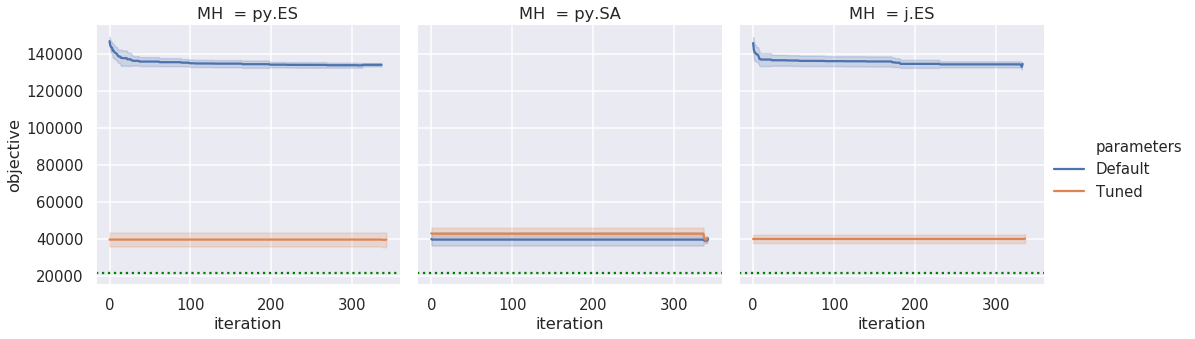

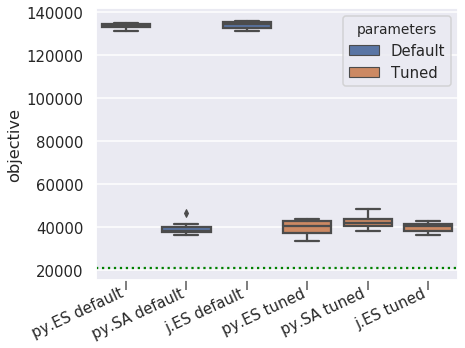

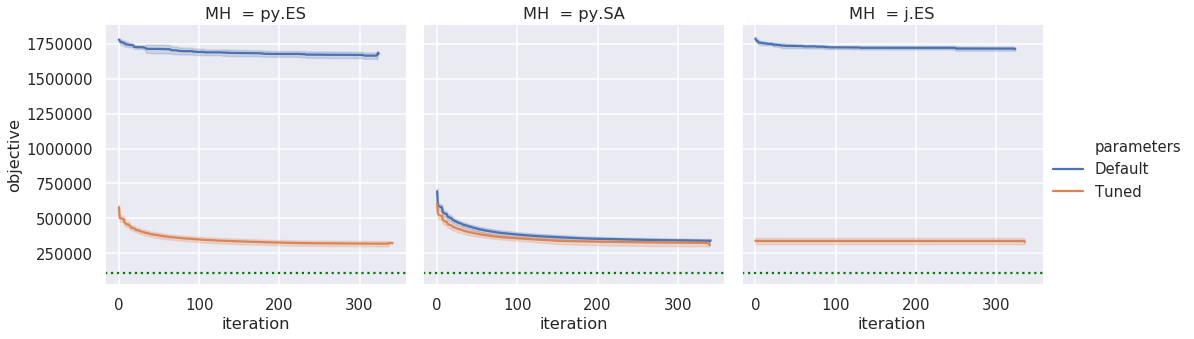

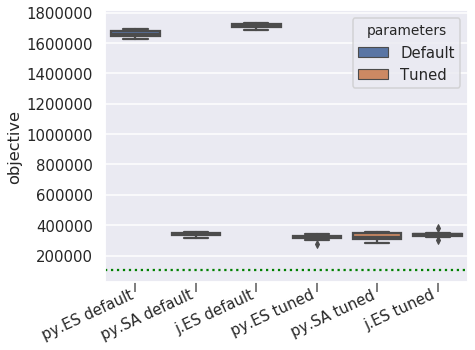

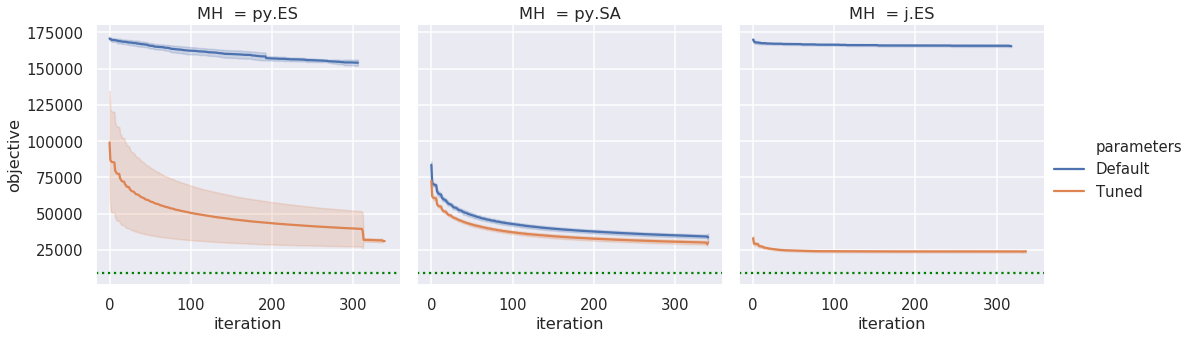

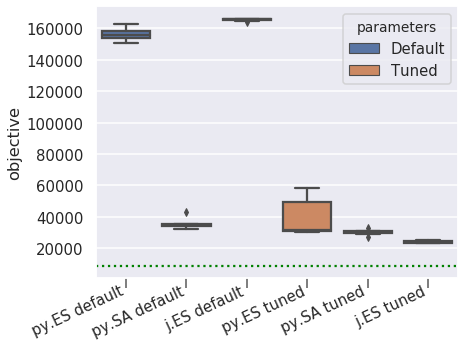

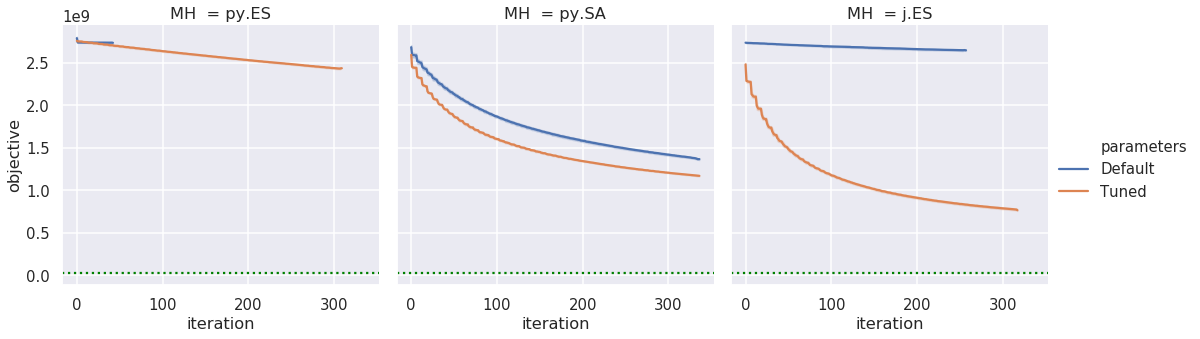

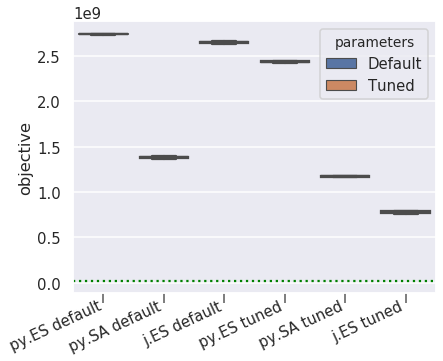

In [12]:
for tsp_instance in tsp_problems:
    
    # --- Intermediate results ---
    condition = (all_processes["TSP instance"] == tsp_instance) & (all_processes["Experiment Group"] == "MH")
    blp = all_processes[condition].copy(deep=True)

    blp["MH "] = blp["Code"].apply(lambda x: llh_selection[x])
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
    prog_plot = sns.relplot(x="iteration", y='objective', col="MH ", col_wrap=3,
                    kind="line", ci='sd', hue="parameters", # estimator=None, units="Repetition",
                    #palette=sns.color_palette("deep", all_processes[condition]["Scenario"].unique().shape[0]),
                    data=blp
                   )
    [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes]
    #[ax.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum") for ax in g.axes[0]]
    #plt.subplots_adjust(top=0.9)
    name = f"{tsp_instance[:-4]} baseline progress"
    plt.savefig(fname="plots/baseline/" + name + ".svg", dpi=500, bbox_inches='tight')
    #plt.show()
    
    # --- Final boxplots --- 
    f_condition = (all_final_results["TSP instance"] == tsp_instance) & (all_final_results["Experiment Group"] == "MH")
    blf = all_final_results[f_condition].copy(deep=True)
    blf["MH "] = blf["Code"].apply(lambda x: llh_selection[x])
    blf["parameters"] = blf["Code"].apply(lambda x: parameter_selection[x])
    blf["codes_description"] = blf["Code"].apply(lambda x: code_desc_wo_codes[x])

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5), sharey=True)
    
    g = sns.boxplot(x="codes_description", y='objective', hue="parameters", dodge=False, ax=axes, data=blf)
    g.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum")
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    g.set_xlabel('')

    #plt.subplots_adjust(top=0.9)
    #g.set_ylim(0.75 * instances_optimums[tsp_instance], 2.5 * instances_optimums[tsp_instance])
    plt.savefig(fname=f"plots/baseline/{tsp_instance[:-4]} baseline final boxplot.svg", dpi=500, bbox_inches='tight')
    #plt.show()

# Parameter Control

In [13]:
# to see also optimums
instances_boundaries = {
        "kroA100.tsp":  (20000,115282),
        "pr439.tsp":    (97217, 552170),
        "rat783.tsp":   (806, 90000),
        "pla7397.tsp":  (1260728, 3e9),
    }

# to beter see graphs
zoomed_boundaries = {
        "kroA100.tsp":  (20000,45282),
        "pr439.tsp":    (260217, 502170),
        "rat783.tsp":   (22006, 60000),
        "pla7397.tsp":  (0.6e9, 2e9),
    }

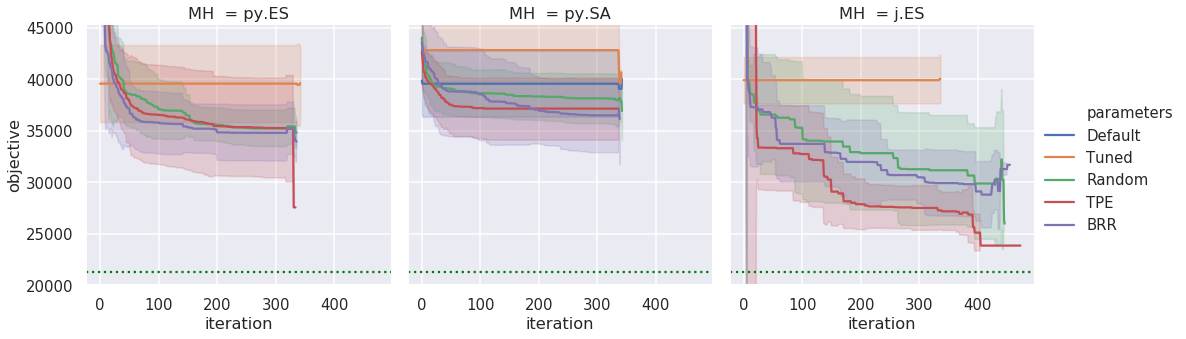

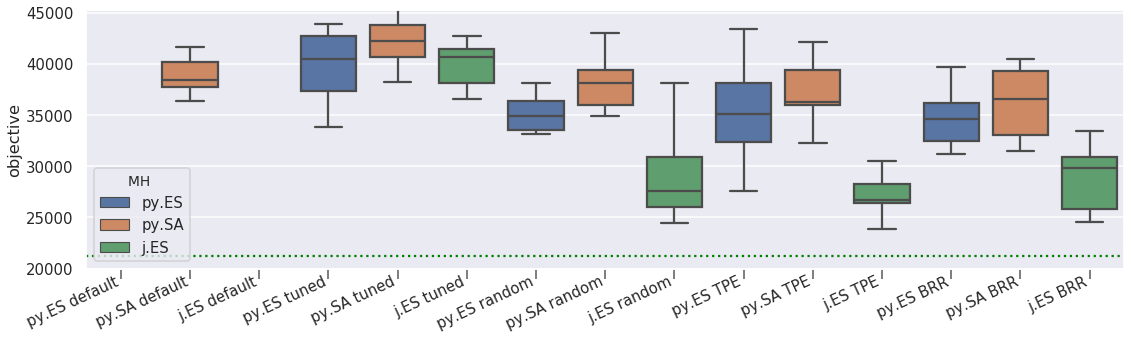

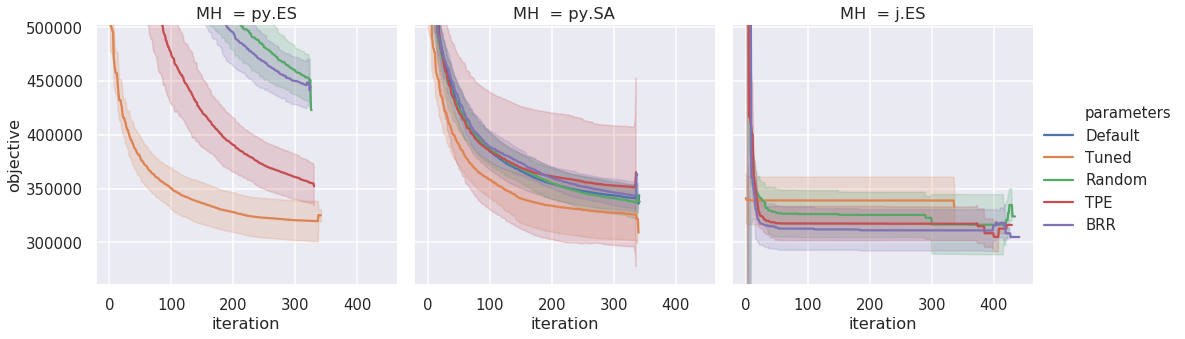

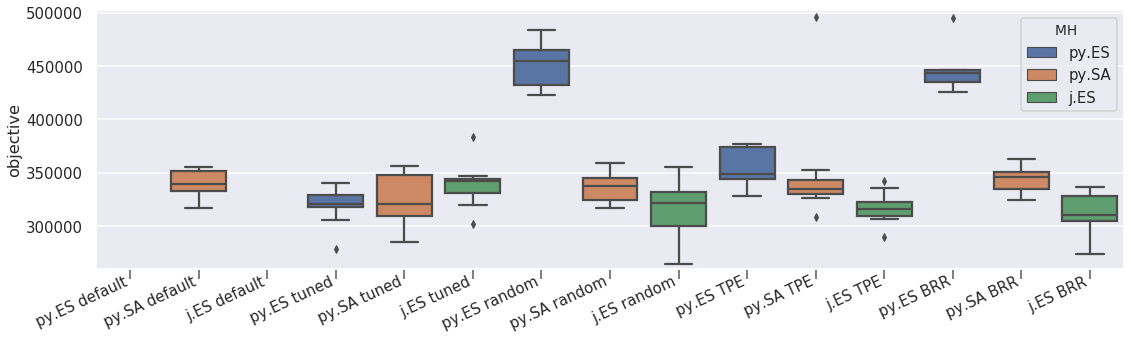

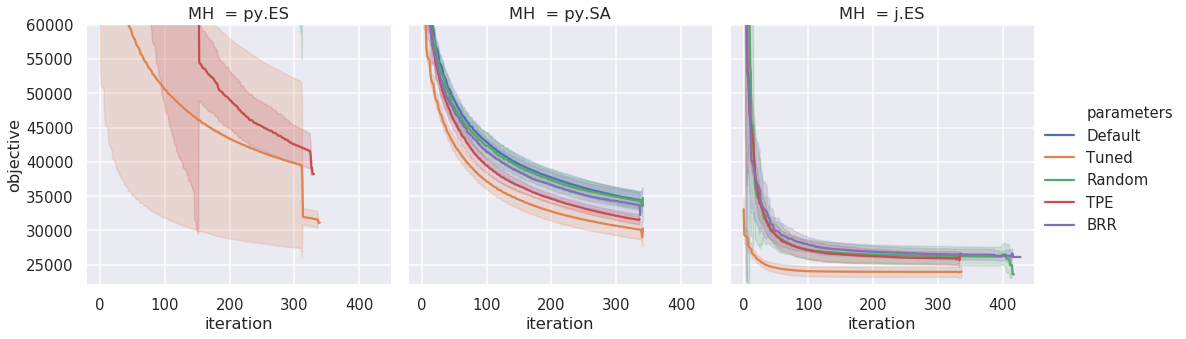

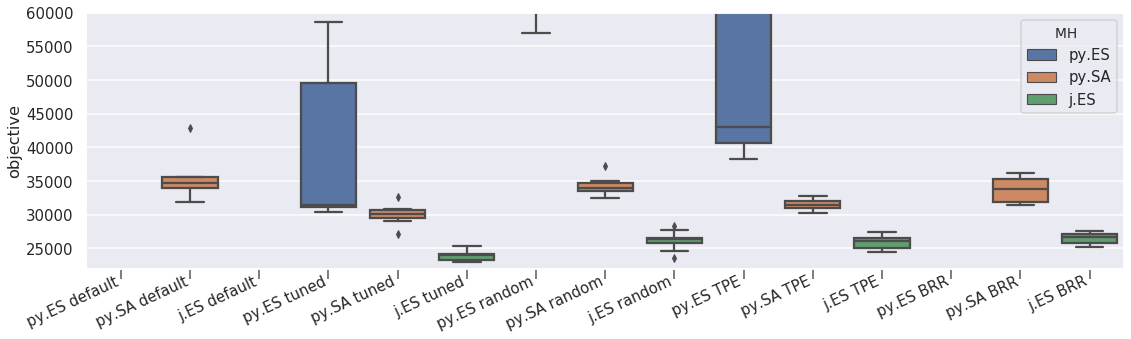

In [14]:
for tsp_instance in tsp_problems[:-1]:
    
    # --- Intermediate results ---
    condition = (all_processes["TSP instance"] == tsp_instance) & ((all_processes["Experiment Group"] == "MH") | (all_processes["Experiment Group"] == "MH-PC"))
    blp = all_processes[condition].copy(deep=True)

    blp["MH "] = blp["Code"].apply(lambda x: llh_selection[x])
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
    prog_plot = sns.relplot(x="iteration", y='objective', col="MH ", col_wrap=3,
                            kind="line", ci='sd', hue="parameters", # estimator=None, units="Repetition",
                            #palette=sns.color_palette("deep", all_processes[condition]["Scenario"].unique().shape[0]),
                            data=blp
                           )
    [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes]
    #[ax.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum") for ax in g.axes[0]]
    prog_plot.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    plt.savefig(fname=f"plots/control/{tsp_instance[:-4]} PC progress.svg", dpi=500, bbox_inches='tight')
    #plt.show()

    # --- Final boxplots ---
    f_condition = (all_final_results["TSP instance"] == tsp_instance) & ((all_final_results["Experiment Group"] == "MH") | (all_final_results["Experiment Group"] == "MH-PC"))
    blf = all_final_results[f_condition].copy(deep=True)
    blf["MH "] = blf["Code"].apply(lambda x: llh_selection[x])
    blf["parameters"] = blf["Code"].apply(lambda x: parameter_selection[x])
    blf["codes_description"] = blf["Code"].apply(lambda x: code_desc_wo_codes[x])
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharey=True)

    g = sns.boxplot(x="codes_description", y='objective', hue="MH ", dodge=False, data=blf, ax=axes)
    g.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum")
    g.set_ylim(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1])
    
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    g.set_xlabel('')
    fig.tight_layout()

    #g.set_ylim(0.75 * instances_optimums[tsp_instance], 2.5 * instances_optimums[tsp_instance])
    plt.savefig(fname=f"plots/control/{tsp_instance[:-4]} PC final boxplot.svg", dpi=500, bbox_inches='tight')
    #plt.show()

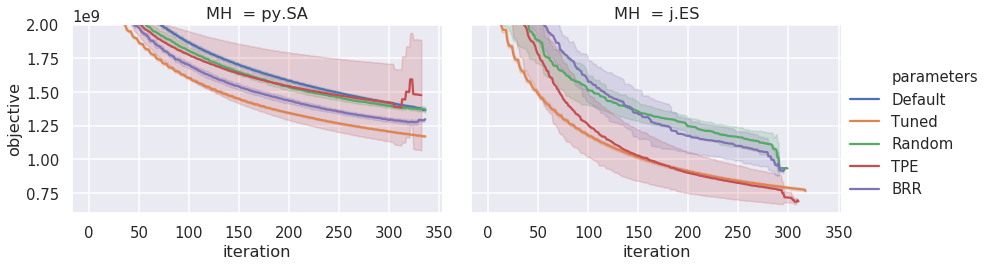

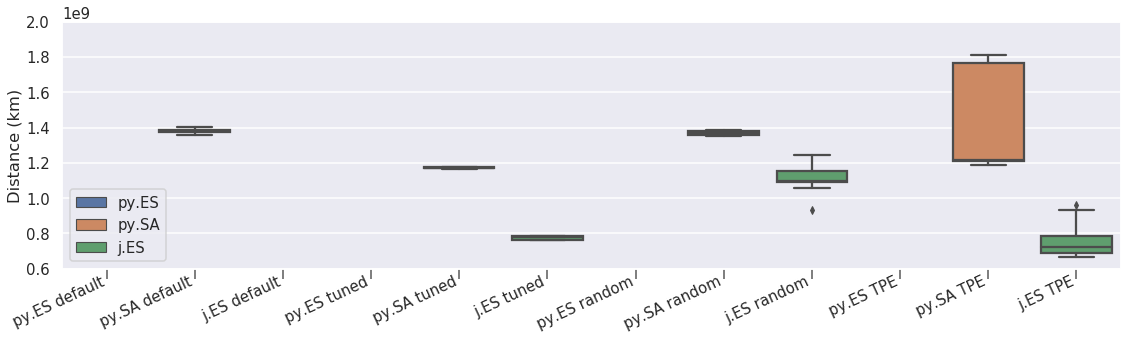

In [17]:
# separate since intermediate results will contain only two columns

for tsp_instance in ["pla7397.tsp"]:
    condition = (all_processes["TSP instance"] == tsp_instance) & ((all_processes["Experiment Group"] == "MH") | (all_processes["Experiment Group"] == "MH-PC"))
    blp = all_processes[condition].copy(deep=True)

    blp["MH "] = blp["Code"].apply(lambda x: llh_selection[x])
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
    blp = blp[blp["MH "] != "py.ES"]

    prog_plot = sns.relplot(x="iteration", y='objective', col="MH ", col_wrap=2,
                    kind="line", ci='sd', hue="parameters", # estimator=None, units="Repetition",
                    #palette=sns.color_palette("deep", all_processes[condition]["Scenario"].unique().shape[0]),
                    data=blp, 
                    height=4, 
                    aspect=1.5,
                   )
    [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes]
    prog_plot.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    plt.savefig(fname=f"plots/control/{tsp_instance[:-4]} PC progress.svg", dpi=500, bbox_inches='tight')
    #plt.show()

    f_condition = (all_final_results["TSP instance"] == tsp_instance) & ((all_final_results["Experiment Group"] == "MH") | (all_final_results["Experiment Group"] == "MH-PC"))
    blf = all_final_results[f_condition].copy(deep=True)
    blf["MH "] = blf["Code"].apply(lambda x: llh_selection[x])
    blf["parameters"] = blf["Code"].apply(lambda x: parameter_selection[x])
    blf["codes_description"] = blf["Code"].apply(lambda x: code_desc_wo_codes[x])
    
    blf = blf[blf["MH "] != "jMetalPy evolution strategy"]
    blf.rename(columns={"objective": "Distance (km)"}, inplace=True)
    blf = blf[blf["codes_description"].apply(lambda x: "BRR" not in x)]
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharey=True)
    
    g = sns.boxplot(x="codes_description", y="Distance (km)", hue="MH ", dodge=False, data=blf, ax=axes)
    #g.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum")
    g.set_ylim(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1])
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    g.set_xlabel('')
    fig.tight_layout()
    axes.legend(loc=3)
    plt.savefig(fname=f"plots/control/{tsp_instance[:-4]} PC final boxplot.svg", dpi=500, bbox_inches='tight')
    #plt.show()

# Selection Hyper-Heuristic

In [19]:
# loading the intermediate experiment results, including the llh type
tsp_chronics, _ = load_tsp_results("./dumps/1st benchmark/", exp_chronics_loader)

/media/sem/B54BE5B22C0D3FA81/TUD/Master/code/experiments/hh_experiments_loading.py:290: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/sem/mypyvenv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
llh_names = {
    "jMetalPy.EvolutionStrategy" : "py.ES",
    "jMetalPy.SimulatedAnnealing": "py.SA",
    "jMetal.EvolutionStrategy"   : "j.ES"
}

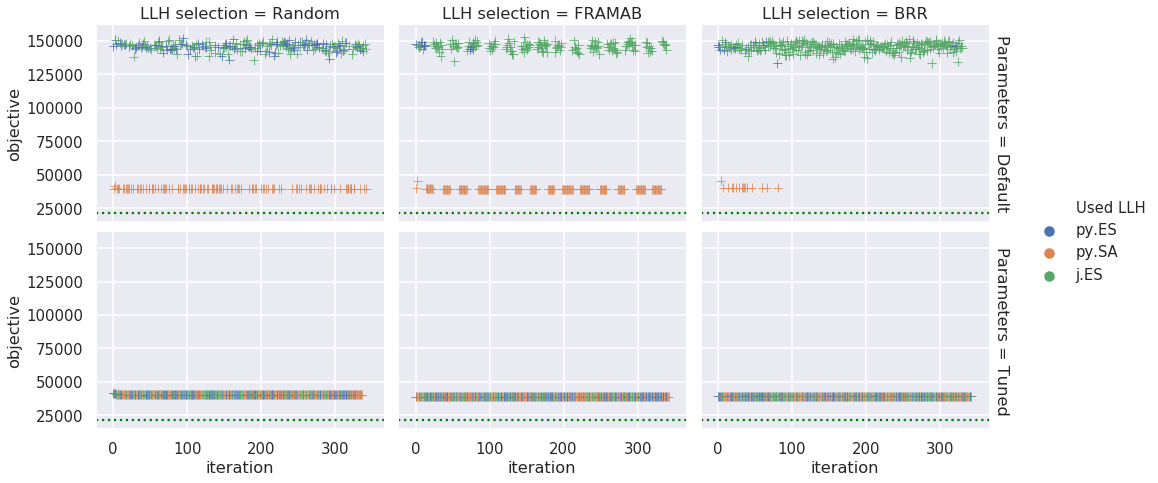

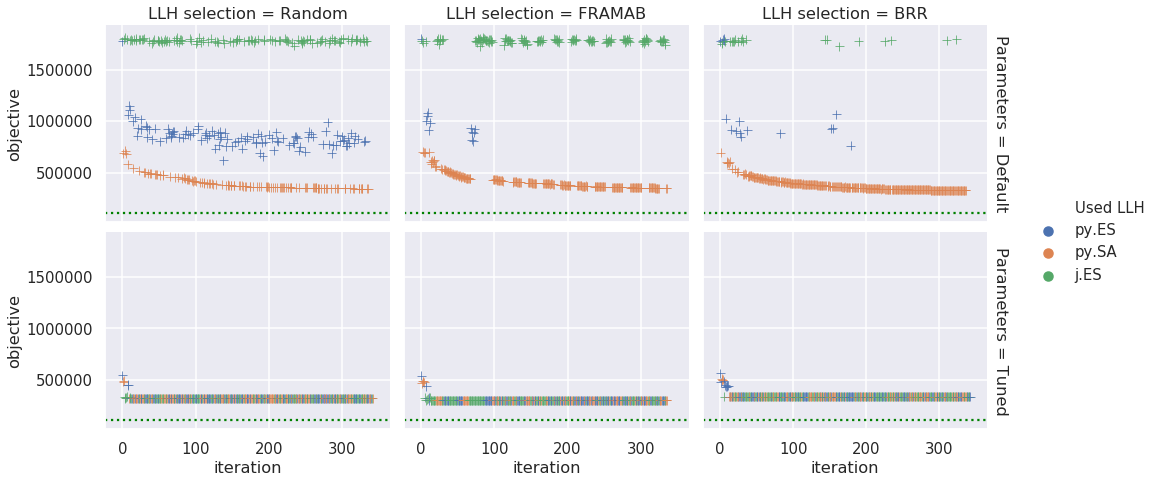

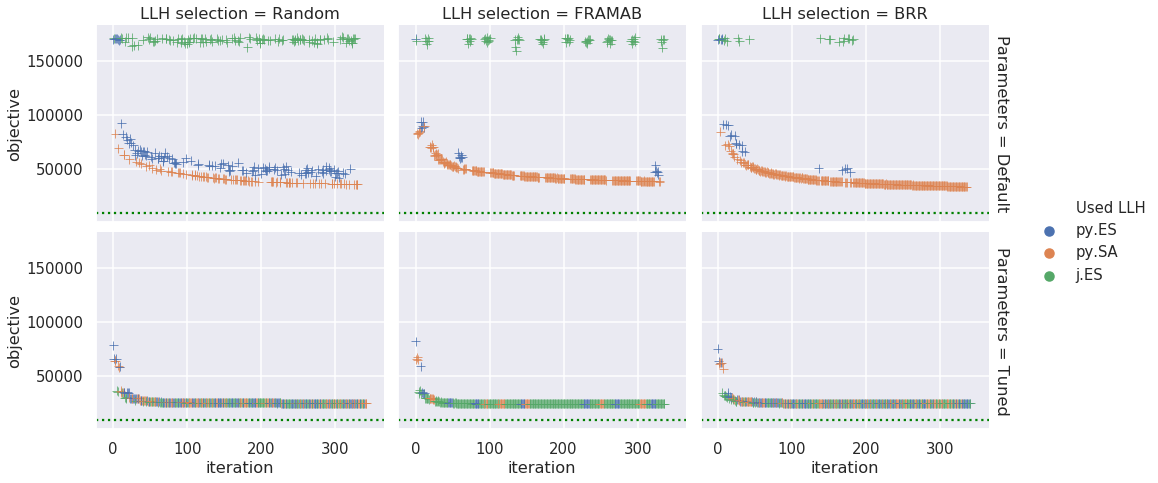

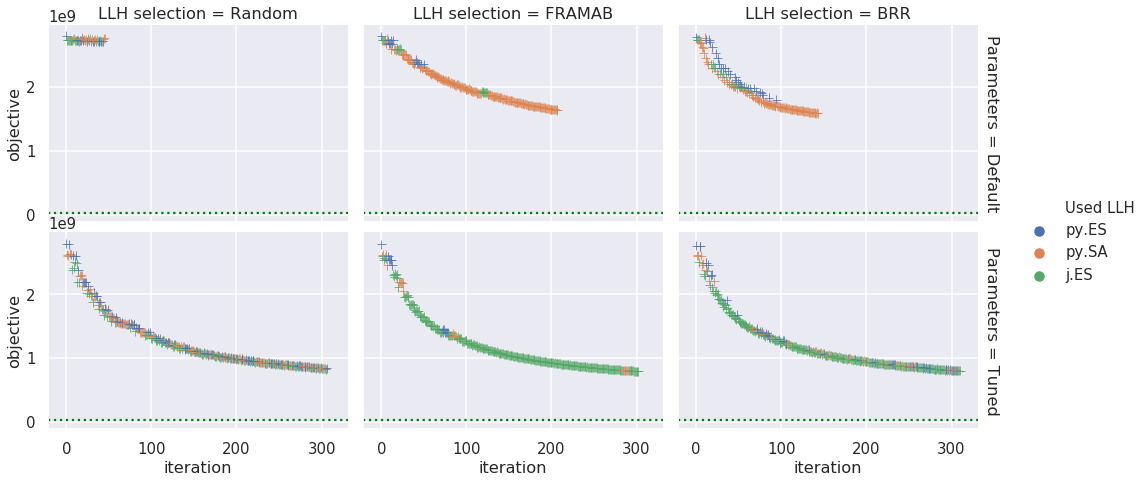

In [21]:
for tsp_instance in tsp_problems:
    condition = (tsp_chronics["TSP instance"] == tsp_instance) & (tsp_chronics["Experiment Group"] == "HH-SP") & (tsp_chronics["Repetition"] == 0)
    blp = tsp_chronics[condition].copy(deep=True)

    blp["Used LLH"] = blp["low level heuristic"].apply(lambda x: llh_names[x])
    blp["LLH selection"] = blp["Code"].apply(lambda x: llh_selection[x])
    blp["Parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])

    prog_plot = sns.relplot(x="iteration", y='objective', row="Parameters", col="LLH selection",
                            marker="+", hue="Used LLH", hue_order=["py.ES", "py.SA", "j.ES"],
                            data=blp, height=3.5, aspect=1.4, facet_kws={'margin_titles':True})

    [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes.flatten()]
    prog_plot.fig.subplots_adjust(wspace=.05, hspace=.05)

    plt.savefig(fname=f"plots/hh-sp/{tsp_instance[:-4]} HH-SP progress.svg", dpi=500, bbox_inches='tight')
    #plt.show()

In [23]:
# to see also optimums, but need to uncomment optimum drawing below 
instances_boundaries = {
        "kroA100.tsp":  (30000,80282),
        "pr439.tsp":    (257217, 732170),
        "rat783.tsp":   (20006, 100000),
        "pla7397.tsp":  (13260728, 3e9),
    }

# to beter see graphs
zoomed_boundaries = {
        "kroA100.tsp":  (32000,47282),
        "pr439.tsp":    (275217, 420170),
        "rat783.tsp":   (20006, 50000),
        "pla7397.tsp":  (0.6e9, 2.8e9),
    }

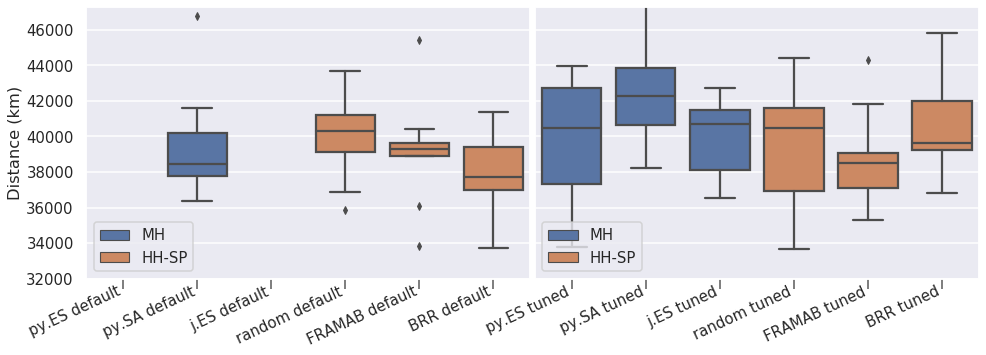

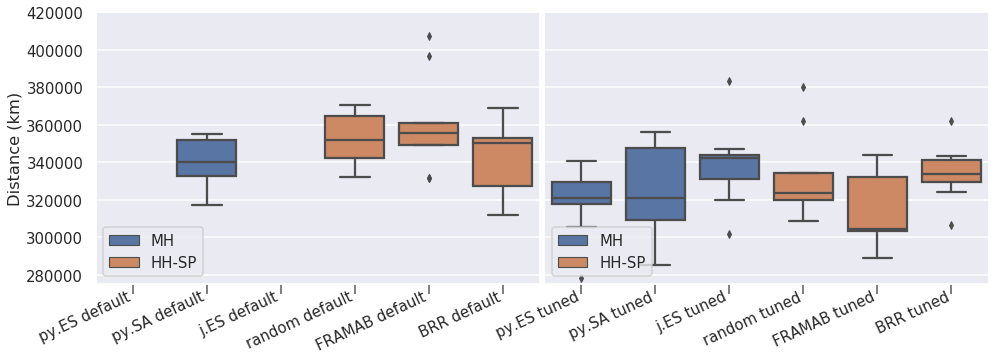

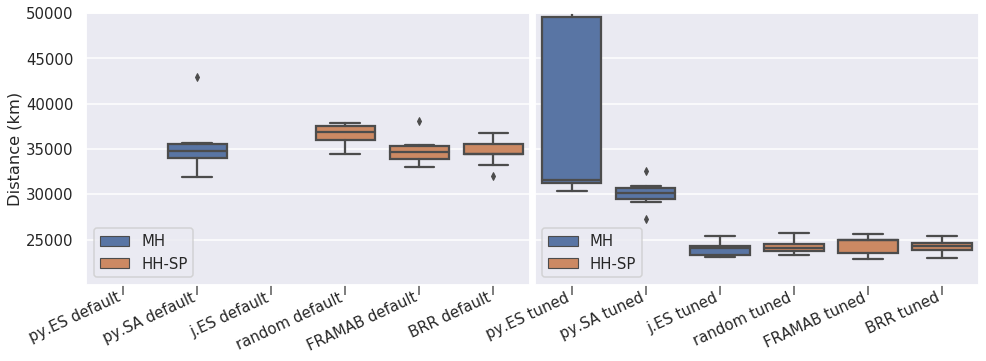

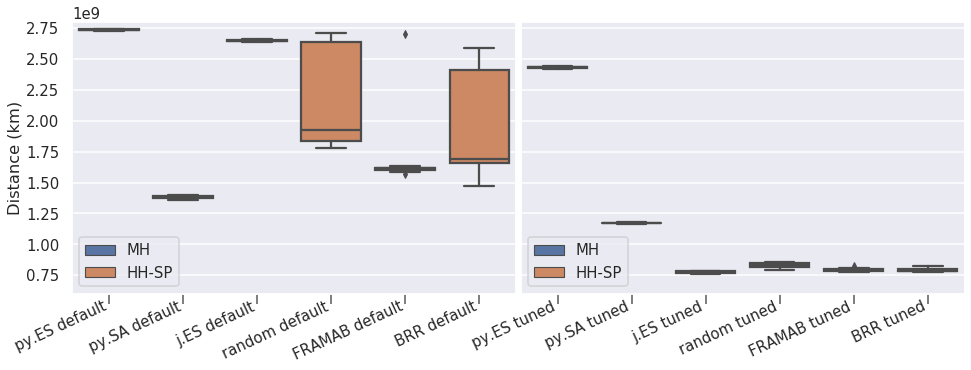

In [28]:
for tsp_instance in tsp_problems:
    condition = (all_final_results["TSP instance"] == tsp_instance) & ((all_final_results["Experiment Group"] == "HH-SP") | (all_final_results["Experiment Group"] == "MH"))
    blf = all_final_results[condition].copy(deep=True)
    blf["parameters"] = blf["Code"].apply(lambda x: parameter_selection[x])
    blf["codes_description"] = blf["Code"].apply(lambda x: code_desc_wo_codes[x])
    blf.rename(columns={"objective": "Distance (km)"}, inplace=True)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01})
    # Default parameters
    g = sns.boxplot(x="codes_description", y="Distance (km)", 
                    hue="Experiment Group",
                    dodge=False, 
                    data=blf[blf["parameters"] == "Default"],
                    ax=axes[0]
                   )
    #g.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum")
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    g.set_xlabel('')
    
    # Tuned parameters
    g = sns.boxplot(x="codes_description", y="Distance (km)", 
                    hue="Experiment Group",
                    dodge=False,
                    data=blf[blf["parameters"] == "Tuned"],
                    ax=axes[1]
                   )
    
    #g.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum")
    g.set_ylim(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1])
    g.set_ylabel('')
    
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    g.set_xlabel('')
    [ax.legend(loc=3) for ax in axes]
    #fig.tight_layout()
    plt.savefig(fname=f"plots/hh-sp/{tsp_instance[:-4]} HH-SP final boxplot.svg", dpi=500, bbox_inches='tight')
    #plt.show()

# Selection hyper-heuristic with parameter control

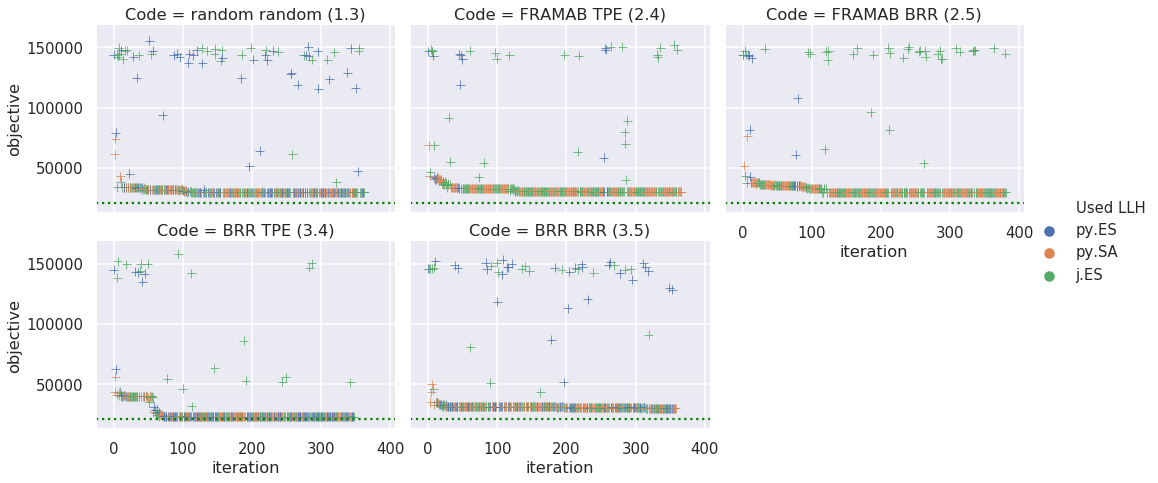

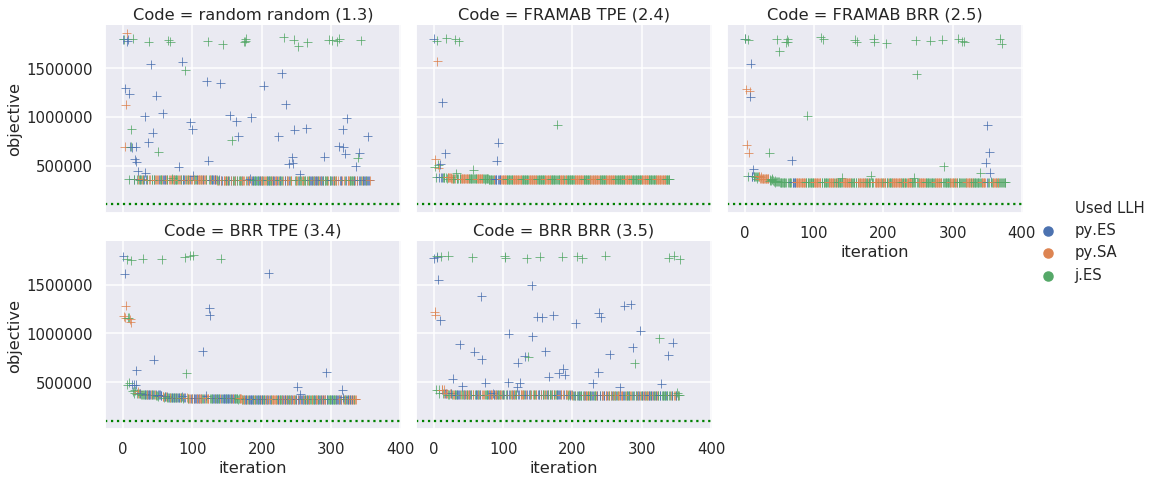

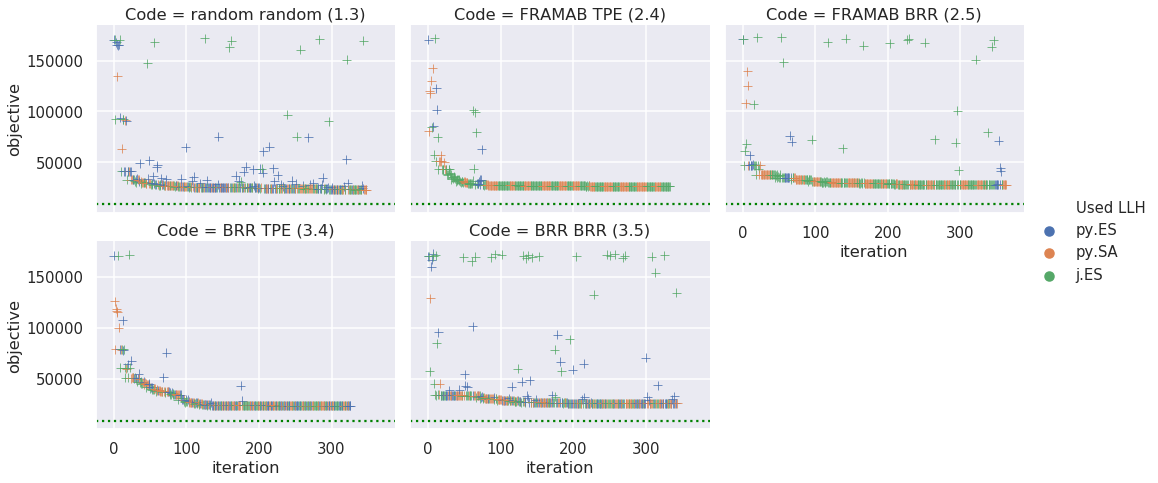

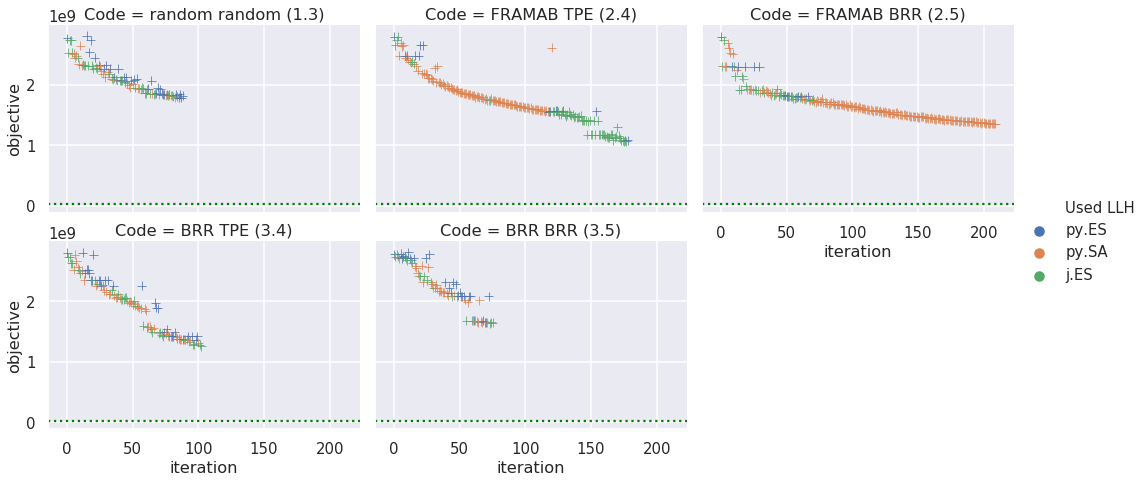

In [31]:
for tsp_instance in tsp_problems:
    condition = (tsp_chronics["TSP instance"] == tsp_instance) & (tsp_chronics["Experiment Group"] == "HH-PC") & (tsp_chronics["Repetition"] == 0)
    blp = tsp_chronics[condition].copy(deep=True)

    blp["Used LLH"] = blp["low level heuristic"].apply(lambda x: llh_names[x])
    blp["Code"] = blp["Code"].apply(lambda x: code_desc_w_codes[x])
    prog_plot = sns.relplot(x="iteration", y='objective', col="Code", col_wrap=3, marker="+", ci='sd', 
                            hue="Used LLH", hue_order=["py.ES", "py.SA", "j.ES"],
                            data=blp, 
                            height=3.5, aspect=1.4, #facet_kws={'margin_titles':True},
                           )
    [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes.flatten()]
    prog_plot.fig.subplots_adjust(wspace=.05, hspace=.15)
    #[ax.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum") for ax in g.axes[0]]
    #prog_plot.set(ylim=(instances_boundaries[tsp_instance][0], instances_boundaries[tsp_instance][1]))
    plt.savefig(fname=f"plots/hh-pc/{tsp_instance[:-4]} HH-PC progress.svg", dpi=500, bbox_inches='tight')
    #plt.show()

In [32]:
# to see also optimums
instances_boundaries = {
        "kroA100.tsp":  (20000,50282),
        "pr439.tsp":    (97217, 432170),
        "rat783.tsp":   (8006, 60000),
        "pla7397.tsp":  (13260728, 3e9),
    }

# to beter see graphs
zoomed_boundaries = {
        "kroA100.tsp":  (20000,49282),
        "pr439.tsp":    (275217, 390170),
        "rat783.tsp":   (22506, 36000),
        "pla7397.tsp":  (0.6e9, 2.8e9),
    }

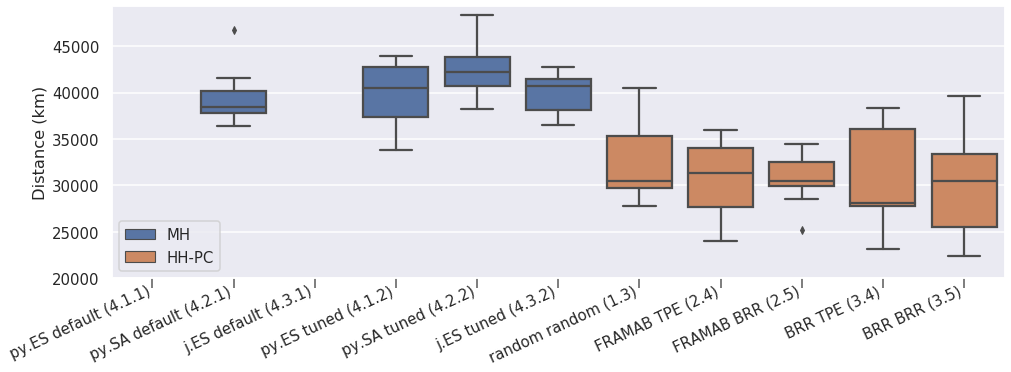

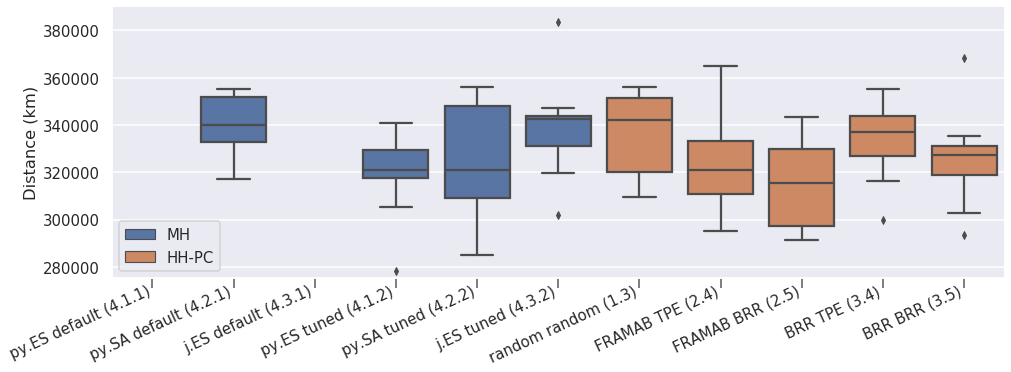

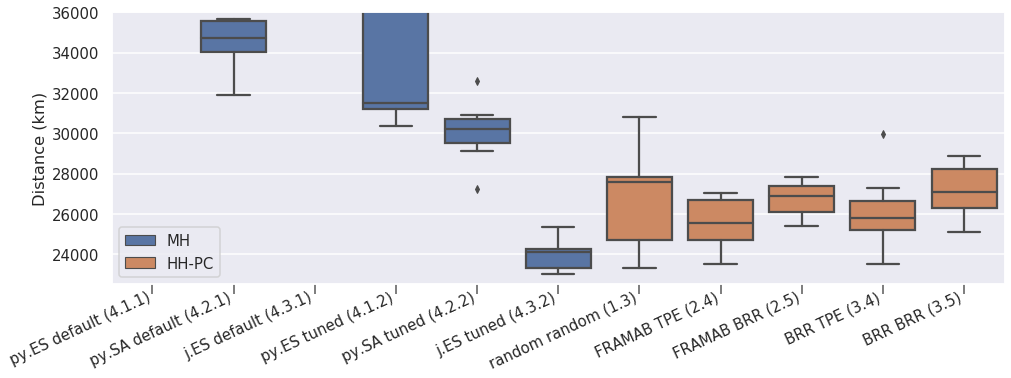

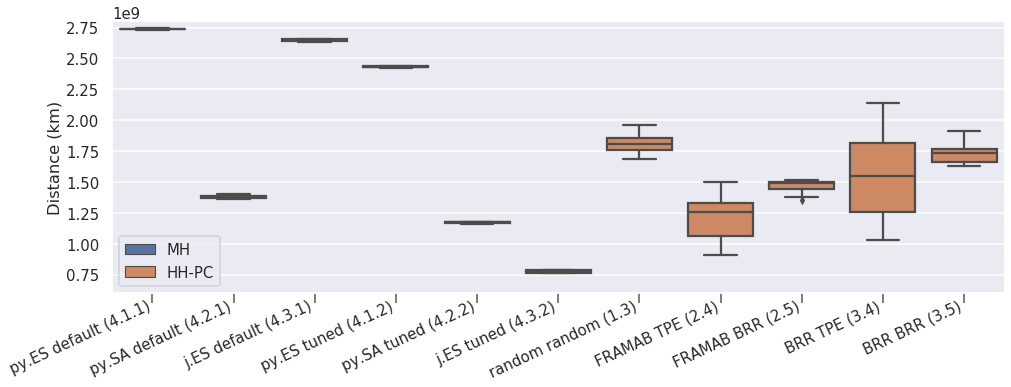

In [34]:
for tsp_instance in tsp_problems:
    condition = (all_final_results["TSP instance"] == tsp_instance) & ( (all_final_results["Experiment Group"] == "MH") | (all_final_results["Experiment Group"] == "HH-PC"))
    blf = all_final_results[condition].copy(deep=True)
    #blf["MH "] = blf["Code"].apply(lambda x: mhs[x])
    blf["parameters"] = blf["Code"].apply(lambda x: parameter_selection[x])
    blf["codes_description"] = blf["Code"].apply(lambda x: code_desc_w_codes[x])
    blf.rename(columns={"objective": "Distance (km)"}, inplace=True)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01})
    
    g = sns.boxplot(x="codes_description", y="Distance (km)", hue="Experiment Group", dodge=False, data=blf, ax=axes)

    g.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    g.set_xlabel('')
    axes.legend(loc=3)
    plt.savefig(fname=f"plots/hh-pc/{tsp_instance[:-4]} HH-PC final boxplot.svg", dpi=500, bbox_inches='tight')
    #plt.show()

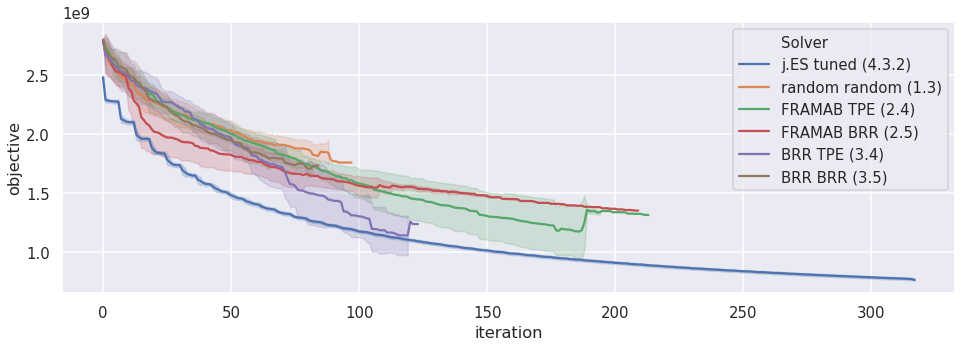

In [40]:
for tsp_instance in ["pla7397.tsp"]:
    condition = (all_processes["TSP instance"] == tsp_instance) & \
                ((all_processes["Experiment Group"] == "HH-PC") | ((all_processes["Experiment Group"] == "MH") & (all_processes["Code"].isin(("4.3.2",)))))
    df = all_processes[condition].copy(deep=True)
    df["Solver"] = df["Code"].apply(lambda x: code_desc_w_codes[x])
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                             sharey=True,
                             gridspec_kw={'wspace':0.01, 'hspace':0.01}
                            )
    rplt = sns.lineplot(x="iteration", y='objective', 
                        ci='sd', hue="Solver", # estimator=None, units="Repetition",
                        data=df, ax=axes)
    plt.savefig(fname=f"plots/hh-pc/{tsp_instance[:-4]} HH-PC vs jES progress.svg", dpi=500, bbox_inches='tight')
    plt.show()

# Debugging

### visualize the average number of external iterations by py.ES with default params for each instance

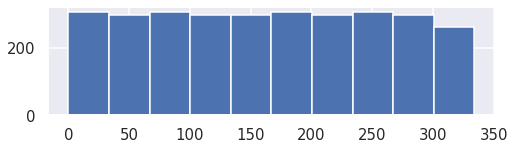

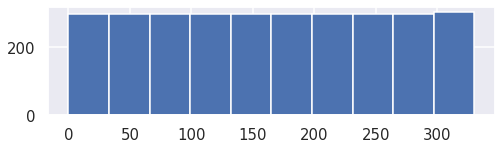

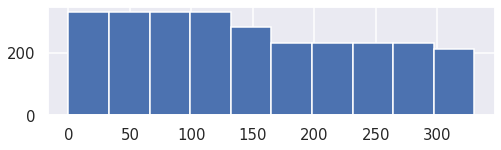

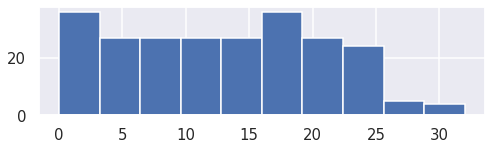

In [7]:
#print(all_processes)
instances = all_processes["TSP instance"].astype("category").unique()
for i, inst in enumerate(instances):
    plt.figure(i, figsize =(8,2))
    condition = (all_processes["TSP instance"] == inst) & (all_processes["Code"] == "4.1.4")
    all_processes[condition]["iteration"].hist()

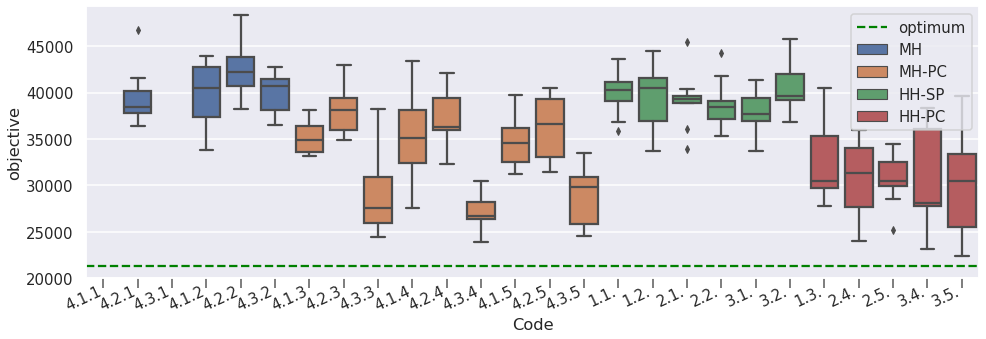

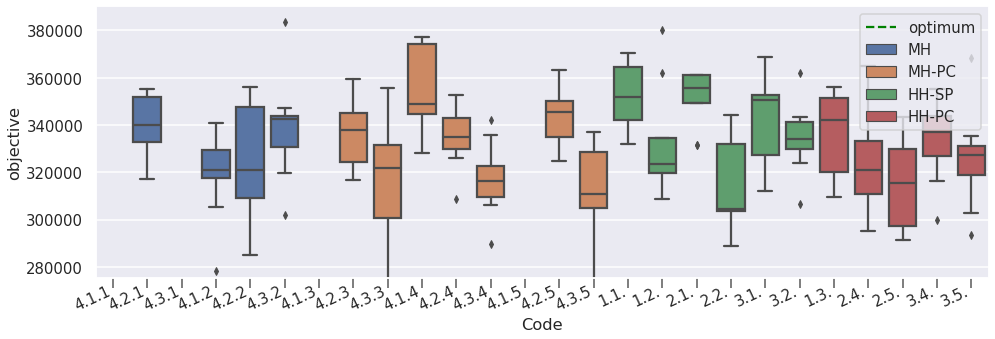

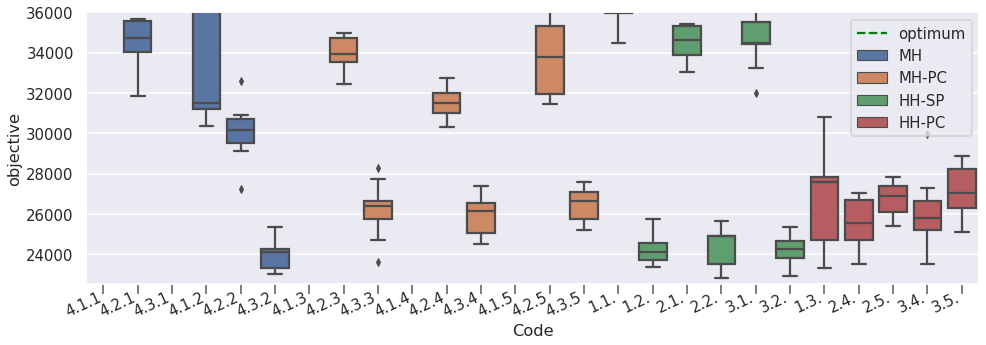

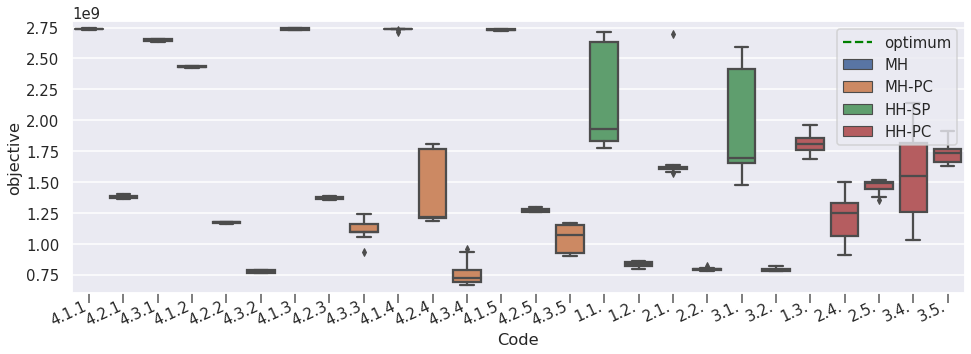

In [45]:
#tsp_instance = "kroA100.tsp"

for tsp_instance in tsp_problems:
#for tsp_instance in ["kroA100.tsp"]:
    condition = (all_final_results["TSP instance"] == tsp_instance)
    blf = all_final_results[condition].copy(deep=True)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                             sharey=True,
                             gridspec_kw={'wspace':0.01}
                            )
    g = sns.boxplot(x="Code", y='objective', 
                    hue="Experiment Group",
                    dodge=False, 
                    data=blf,
                    ax=axes
                   )
    g.axes.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum")
    g.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    axes.legend(loc=1)
    plt.show()

In [46]:
group = all_final_results[all_final_results['TSP instance'] == "pla7397.tsp"][["Experiment Group","Code", "iteration", "objective", "Optimum"]].groupby(["Experiment Group","Code"])
r = group.agg([pd.np.min, pd.np.mean, pd.np.std])
r.style.format("{:.0f}")